# Verification of new R factor calcuation

This notebook shows a comparison of the old and new R factor calculation on the example of Hematite 2x1.

In [ ]:
# Imports
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import get_window
from rfactor import r_factor_new as rf
from interpolation import interpolation as intpol

import matplotlib.pyplot as plt
%matplotlib inline

ImportError: dlopen(/Users/alexander/Documents/GitHub/viperleed/tleedmlib/wrapped/rfactor.so, 0x0002): symbol not found in flat namespace '_pendry_y_single_beam_'

## Check of mathematical R factor properties

(2.0, 26.11533541273696, 13.05766770636848, 100)

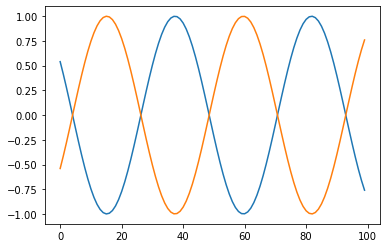

In [ ]:
# anticorrolated data should yield R factor of 2

cos_func = np.cos(np.linspace(1,15,100))
sin_func = np.cos(np.linspace(1,15,100) + np.pi)

step = np.linspace(1,15,100)[1] - np.linspace(1,10,100)[0]

plt.plot(cos_func)
plt.plot(sin_func)
rf.r_pendry_beam_y(step, cos_func, sin_func, 1, 1, 100, 100, 0)


(0.0, 0.0, 13.057667706368479, 100)

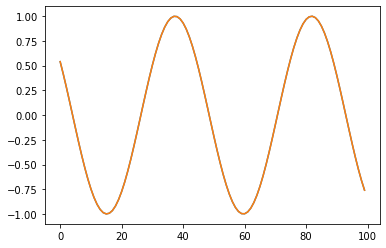

In [ ]:
# perfectly corrolated data should yield R factor of 0

cos_func = np.cos(np.linspace(1,15,100))
sin_func = np.cos(np.linspace(1,15,100) + np.pi)

step = np.linspace(1,15,100)[1] - np.linspace(1,10,100)[0]

plt.plot(cos_func)
plt.plot(cos_func)
rf.r_pendry_beam_y(step, cos_func, cos_func, 1, 1, 100, 100, 0)

In [ ]:
# uncorrolated data should yield r-factor of ~1

rand1_func = np.random.rand(100)*2-1
cos_func = np.cos(np.linspace(1,15,100) + np.pi)

plt.plot(rand1_func)
plt.plot(cos_func)

results = []
iterations = 1000
for i in range(iterations):
    rand1_func = np.random.rand(100)*2-1
    res = rf.r_pendry_beam_y(step, rand1_func, cos_func, 1, 1, 100, 100, 0)
    results.append(res[0])
    if i < 5:
        print(rf.r_pendry_beam_y(step, rand1_func, cos_func, 1, 1, 100, 100, 0))

print("...", "\n")
# Because we are comparing random funtions, they will deviate from 1, but should average to unity.
print(f"Average over {iterations} interations: {sum(results)/iterations}")

NameError: name 'plt' is not defined

## Load data for Hematite 2x1

In [ ]:
# ViperLEED interpolation degree (3 or 5)
deg = 3

deg_folder = f"viper_deg_{deg}/"

In [ ]:
# Viperleed data was extracted during execution using the Python debugger

viper_i_theo = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_theo_intensity.csv", delimiter = ",")
viper_y_theo = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_theo_y.csv", delimiter = ",")

viper_y_exp = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_exp_y.csv", delimiter = ",")
viper_i_exp = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_exp_intensity.csv", delimiter = ",")

# Load energy arrays
viper_energy = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_exp_energies.csv", delimiter = ",")
tenser_energy = np.loadtxt(f"verification_data/Hematite2x1/tenserleed_energy.csv", delimiter = ",")

In [ ]:
# Load start ids and number of datapoints for every array
viper_exp_start = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_exp_start.csv", delimiter = ",").astype(int)
viper_theo_start = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_theo_start.csv", delimiter = ",").astype(int)

viper_exp_n_beams = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_exp_n_beams.csv", delimiter = ",").astype(int)
viper_theo_n_beams = np.loadtxt(f"verification_data/Hematite2x1/{deg_folder}viper_theo_n_beams.csv", delimiter = ",").astype(int)

In [ ]:
# TensErLEED data was extracted using the IPR switch in the WEXPEL file
tenser_y_theo = np.loadtxt(f"verification_data/Hematite2x1/tenserleed_y_theo.csv", delimiter = ",")
tenser_y_exp = np.loadtxt(f"verification_data/Hematite2x1/tenserleed_y_exp.csv", delimiter = ",")

In [ ]:
# Load start ids an number of datapoints for TenserLEED as well
tenser_exp_start = np.loadtxt(f"verification_data/Hematite2x1/tenserleed_exp_id_start.csv", delimiter = ",").astype(int)
tenser_theo_start = np.loadtxt(f"verification_data/Hematite2x1/tenserleed_theo_id_start.csv", delimiter = ",").astype(int)

tenser_exp_n_beams = np.loadtxt(f"verification_data/Hematite2x1/tenserleed_exp_n_beams.csv", delimiter = ",").astype(int)
tenser_theo_n_beams = np.loadtxt(f"verification_data/Hematite2x1/tenserleed_theo_n_beams.csv", delimiter = ",").astype(int)

In [ ]:
# Is the shape of the new data arrays the same?
tenser_y_exp.shape == viper_y_exp.shape

True

## Diifference of data in detail

In [ ]:
# Change variable beam to look at specific beam
beam = 1

exp_en_viper = viper_energy[viper_exp_start[beam] - 1 : viper_exp_start[beam] + viper_exp_n_beams[beam] - 1]
exp_beam_viper = viper_y_exp[viper_exp_start[beam] - 1 : viper_exp_start[beam] + viper_exp_n_beams[beam] - 1, beam]
exp_en_tenser = tenser_energy[tenser_exp_start[beam] - 1 : tenser_exp_start[beam] + tenser_exp_n_beams[beam] - 1]
exp_beam_tenser = tenser_y_exp[tenser_exp_start[beam] - 1 : tenser_exp_start[beam] + tenser_exp_n_beams[beam] - 1, beam]

theo_en_viper = viper_energy[viper_exp_start[beam] - 1 : viper_exp_start[beam] + viper_exp_n_beams[beam] - 1]
theo_beam_viper = viper_y_theo[viper_exp_start[beam] - 1 : viper_exp_start[beam] + viper_exp_n_beams[beam] - 1, beam]
theo_en_tenser = tenser_energy[tenser_exp_start[beam] - 1 : tenser_exp_start[beam] + tenser_exp_n_beams[beam] - 1]
theo_beam_tenser = tenser_y_theo[tenser_exp_start[beam] - 1 : tenser_exp_start[beam] + tenser_exp_n_beams[beam] - 1, beam]

In [ ]:
# Is the exp beam the same length?
exp_beam_tenser.shape == exp_beam_viper.shape
# Note: this will not be theoretical beam because of how TensErLEED output the theoretical beams

True

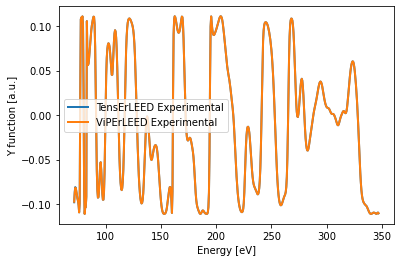

In [ ]:
# Look at plots of experimental beams

plt.plot(exp_en_tenser, exp_beam_tenser, lw = 2, label= "TensErLEED Experimental")
plt.plot(exp_en_viper, exp_beam_viper, lw = 2, label= "ViPErLEED Experimental")
plt.legend()
plt.xlabel("Energy [eV]")
plt.ylabel("Y function [a.u.]")
plt.show()

We see **minimal** to no deviation - as would be expected.

The only notable difference I can see is at the edges of the beams - which must be due to the interpolation boundary conditions.

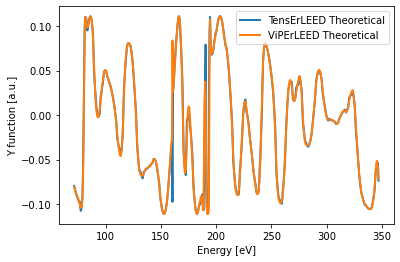

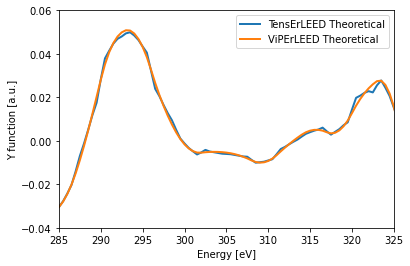

In [ ]:
# plots of theoretical beams
plt.plot(theo_en_tenser, theo_beam_tenser, lw = 2, label= "TensErLEED Theoretical")
plt.plot(theo_en_viper, theo_beam_viper, lw = 2, label= "ViPErLEED Theoretical")
plt.legend()
plt.xlabel("Energy [eV]")
plt.ylabel("Y function [a.u.]")
plt.show()

plt.plot(theo_en_tenser, theo_beam_tenser, lw = 2, label= "TensErLEED Theoretical")
plt.plot(theo_en_viper, theo_beam_viper, lw = 2, label= "ViPErLEED Theoretical")
plt.legend()
plt.xlabel("Energy [eV]")
plt.ylabel("Y function [a.u.]")
plt.xlim([285,325])
plt.ylim([-0.04, 0.06])
plt.show()

Now, the theoretical bemas show clear differences when zoomed in to some regions. This is due to the differnce in interpolation algorithm used. Theoretical data is calculated on a 2 or 3 eV grid and is subsequently interpolated to a 0.5 eV grid. Clearly the new interpolation used by ViPErLEED yields a smoother and more representative Y function.

In [ ]:
# Are the arrays the same size ?
np.all(tenser_exp_start == viper_exp_start), np.all(viper_exp_n_beams == tenser_exp_n_beams)

(True, True)

### Fourier specturm of theoretical beams

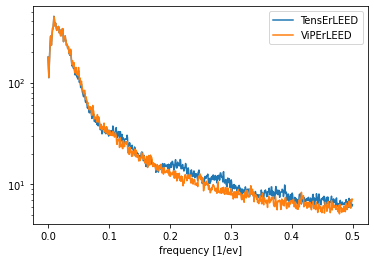

In [ ]:

window_type = 'hanning' # Cut off spectral leakage

tenser_fft = np.zeros([tenser_energy.shape[0]])[0:len(tenser_energy)//2]
viper_fft = np.zeros([viper_energy.shape[0]])[0:len(viper_energy)//2]

for beam in range(57):
    window = get_window(window_type, len(tenser_energy))
    cut_y_tenser = np.abs(np.fft.fft(window * np.nan_to_num(tenser_y_theo[:, beam], nan = 0.0))[0:len(tenser_energy)//2])
    window = get_window(window_type, len(viper_energy))
    cut_y_viper = np.abs(np.fft.fft(window * np.nan_to_num(viper_y_theo[:, beam], nan = 0.0))[0:len(viper_energy)//2])
    tenser_fft += cut_y_tenser
    viper_fft += cut_y_viper
    
tenser_x = np.fft.fftfreq(len(tenser_energy))[:len(tenser_energy)//2]
viper_x = np.fft.fftfreq(len(viper_energy))[:len(viper_energy)//2]


plt.plot(tenser_x, tenser_fft, label = "TensErLEED")
plt.plot(viper_x, viper_fft, label = "ViPErLEED")

plt.legend()
plt.yscale('log')

plt.xlabel("frequency [1/ev]")
plt.show()

## R factor calculation

In [ ]:
# Calling the new R-factor calculation on the Y functions extracted from TensErLEED yields:
tenser_result = rf.r_pendry_beamset_y(0.5, tenser_y_exp, tenser_y_theo, tenser_exp_start, tenser_theo_start, tenser_exp_n_beams, tenser_theo_n_beams, 1)

print(f"R_overall = {tenser_result[0]}")
print(f"Beam R-factors: \n{tenser_result[1]}")

R_overall = 0.33894463180302054
Beam R-factors: 
[0.36935932 0.20381759 0.10024883 0.10507004 0.20619726 0.14069121
 0.19555994 0.39571227 0.12482881 0.20670034 0.14807532 0.25970426
 0.18448059 0.27490919 0.23617165 0.26606968 0.31554282 0.3363171
 0.41537083 0.27495871 0.38061827 0.37086707 0.45187339 0.26804578
 0.64420422 0.23273761 0.2838865  0.30705342 0.41198212 0.48569873
 0.25217995 0.4215403  0.42029666 0.35304994 0.39966046 0.32747133
 0.86728574 0.40867359 0.44494559 0.55689331 0.40409455 0.4107394
 0.47016037 0.4943539  0.52880259 0.5541831  0.69200186 0.8518606
 0.22657641 0.50752565 0.47247815 0.45771413 0.51659663 0.2245998
 0.55948487 0.56450762 0.63642323]


### This matches exactly the output of the TensErLEED calculation:

```
*( 1  0)*               1  0.0001    0.50   71.00  799.50     61.50  0.3693
*(-1 -1)*               2  0.0001    0.50   71.00  799.50    275.50  0.2038
*( 1  1)*               3  0.0001    0.50   71.00  799.50    266.50  0.1002
*( 0 -2)*               4  0.0001    0.50   71.00  799.50    336.50  0.1051
*( 0  2)*               5  0.0001    0.50   71.00  799.50    486.50  0.2062
*( 2  0)*               6  0.0001    0.50   71.00  799.50    500.50  0.1407
*(-1 -2)*               7  0.0001    0.50   71.00  799.50    415.50  0.1956
*( 1  2)*               8  0.0001    0.50   71.00  799.50    451.00  0.3957
*( 2  1)*               9  0.0001    0.50   71.00  799.50    290.00  0.1248
*( 2 -1)*              10  0.0001    0.50   71.00  799.50    477.00  0.2067
*( 2 -2)*              11  0.0001    0.50   71.00  799.50    151.00  0.1481
*( 2  2)*              12  0.0001    0.50   71.00  799.50    504.50  0.2597
*( 1 -3)*              13  0.0001    0.50   71.00  799.50    223.00  0.1845
*( 1  3)*              14  0.0001    0.50   71.00  799.50    485.50  0.2749
*( 3  0)*              15  0.0001    0.50   71.00  799.50    450.50  0.2362
*( 3  1)*              16  0.0001    0.50   71.00  799.50    536.50  0.2661
*( 3 -1)*              17  0.0001    0.50   71.00  799.50    532.50  0.3155
*(-2 -3)*              18  0.0001    0.50   71.00  799.50    374.00  0.3363
*( 2  3)*              19  0.0001    0.50   71.00  799.50    376.50  0.4154
*( 3  2)*              20  0.0001    0.50   71.00  799.50    377.50  0.2750
*( 3 -2)*              21  0.0001    0.50   71.00  799.50    434.50  0.3806
*( 0 -4)*              22  0.0001    0.50   71.00  799.50    377.50  0.3709
*( 0  4)*              23  0.0001    0.50   71.00  799.50    504.50  0.4519
*( 1 -4)*              24  0.0001    0.50   71.00  799.50    285.00  0.2681
*( 1  4)*              25  0.0001    0.50   71.00  799.50    485.00  0.6442
*( 4  0)*              26  0.0001    0.50   71.00  799.50    376.00  0.2327
*( 3  3)*              27  0.0001    0.50   71.00  799.50    434.50  0.2839
*( 3 -3)*              28  0.0001    0.50   71.00  799.50    387.00  0.3071
*( 4 -1)*              29  0.0001    0.50   71.00  799.50    368.50  0.4120
*( 4  1)*              30  0.0001    0.50   71.00  799.50    221.50  0.4857
*(-2 -4)*              31  0.0001    0.50   71.00  799.50    281.00  0.2522
*( 2  4)*              32  0.0001    0.50   71.00  799.50    433.00  0.4215
*( 4  2)*              33  0.0001    0.50   71.00  799.50    400.50  0.4203
*( 4 -2)*              34  0.0001    0.50   71.00  799.50    397.00  0.3531
*( 1 -5)*              35  0.0001    0.50   71.00  799.50    312.00  0.3997
*( 1  5)*              36  0.0001    0.50   71.00  799.50    253.50  0.3275
*(-3 -4)*              37  0.0001    0.50   71.00  799.50     76.00  0.8673
*( 3  4)*              38  0.0001    0.50   71.00  799.50    213.00  0.4087
*( 4  3)*              39  0.0001    0.50   71.00  799.50    278.50  0.4449
*( 4 -3)*              40  0.0001    0.50   71.00  799.50    160.00  0.5569
*( 5  0)*              41  0.0001    0.50   71.00  799.50    224.50  0.4041
*( 2 -5)*              42  0.0001    0.50   71.00  799.50    115.50  0.4108
*( 2  5)*              43  0.0001    0.50   71.00  799.50    100.00  0.4702
*( 5  1)*              44  0.0001    0.50   71.00  799.50    263.00  0.4944
*( 5 -1)*              45  0.0001    0.50   71.00  799.50    247.50  0.5288
*( 5 -2)*              46  0.0001    0.50   71.00  799.50    134.50  0.5542
*( 5  2)*              47  0.0001    0.50   71.00  799.50    206.00  0.6920
*( 4 -4)*              48  0.0001    0.50   71.00  799.50    147.50  0.8519
*( 4  4)*              49  0.0001    0.50   71.00  799.50    139.50  0.2266
*(-3 -5)*              50  0.0001    0.50   71.00  799.50    146.00  0.5075
*( 3  5)*              51  0.0001    0.50   71.00  799.50    136.50  0.4725
*( 0 -6)*              52  0.0001    0.50   71.00  799.50     95.50  0.4577
*( 0  6)*              53  0.0001    0.50   71.00  799.50     48.00  0.5166
*( 5 -3)*              54  0.0001    0.50   71.00  799.50    108.50  0.2246
*( 5  3)*              55  0.0001    0.50   71.00  799.50    122.50  0.5595
*( 2 -6)*              56  0.0001    0.50   71.00  799.50     38.50  0.5645
*( 2  6)*              57  0.0001    0.50   71.00  799.50     77.00  0.6364
AV.-INT                -1  0.0001    0.50   71.00  799.50  16601.00  0.3389  <---
AVERAGE                 0  0.0001    0.50   71.00  799.50  16601.00  0.3389  <---
```

### This means, the R-factor calculation finally performs as expected!

In [ ]:
# Calling the R-factor calcualtion for Viperleed data:

viper_result = rf.r_pendry_beamset_y(0.5, viper_y_exp, viper_y_theo, viper_exp_start, viper_theo_start, viper_exp_n_beams, viper_theo_n_beams, 1)

print(f"R_overall = {viper_result[0]}", "\n")
print(f"Beam R-factors: \n{viper_result[1]}")

R_overall = 0.34082762831938057 

Beam R-factors: 
[0.35242604 0.19851344 0.09585896 0.10869723 0.20456343 0.14727097
 0.20116734 0.39541316 0.11646194 0.20513009 0.14784475 0.26223489
 0.172127   0.27883498 0.23535857 0.26711267 0.31361703 0.33186344
 0.42317892 0.2933319  0.3812396  0.36581192 0.45666274 0.26861389
 0.65223672 0.23309308 0.28866089 0.30853958 0.41681708 0.48125849
 0.25487177 0.42254767 0.42413804 0.34938108 0.39644325 0.32905405
 0.87081007 0.40766214 0.45526736 0.55835394 0.41108712 0.39961778
 0.48196602 0.49752795 0.52725577 0.55703779 0.70894753 0.84619402
 0.22420471 0.50581232 0.47349245 0.45469094 0.52882105 0.25400812
 0.56094662 0.56592593 0.63619914]


R_viper - R_tenser = 0.001882996516360036
Beam R-factors: 
[-0.01693328 -0.00530415 -0.00438988  0.00362719 -0.00163384  0.00657977
  0.0056074  -0.00029911 -0.00836688 -0.00157024 -0.00023057  0.00253063
 -0.0123536   0.0039258  -0.00081309  0.00104299 -0.00192579 -0.00445366
  0.00780809  0.01837318  0.00062133 -0.00505515  0.00478935  0.00056812
  0.0080325   0.00035547  0.00477439  0.00148615  0.00483496 -0.00444024
  0.00269182  0.00100737  0.00384138 -0.00366886 -0.00321721  0.00158272
  0.00352434 -0.00101144  0.01032177  0.00146063  0.00699257 -0.01112162
  0.01180566  0.00317405 -0.00154682  0.00285469  0.01694567 -0.00566658
 -0.0023717  -0.00171334  0.0010143  -0.00302318  0.01222442  0.02940832
  0.00146176  0.00141831 -0.00022408]


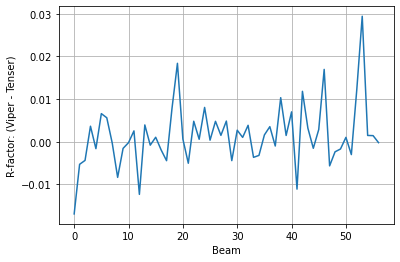

In [ ]:
# Difference:

print(f"R_viper - R_tenser = {viper_result[0] - tenser_result[0]}")
print(f"Beam R-factors: \n{viper_result[1] - tenser_result[1]}")
plt.plot(viper_result[1] - tenser_result[1])

plt.xlabel("Beam")
plt.ylabel("R-factor: (Viper - Tenser)")
plt.grid()

Is the difference caused by the different interpolation boundary conditions?

If so, the difference per beam should negatively corrolate with beam length:

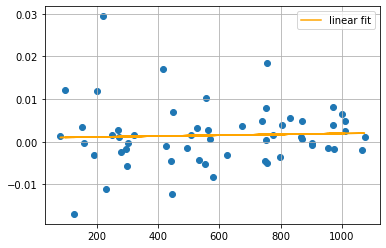

In [ ]:
lengths = viper_exp_n_beams
diff = viper_result[1] - tenser_result[1]

def lin_f(x, a, b):
    return a*x + b
popt, pocv = curve_fit(lin_f, lengths, diff)

plt.scatter(lengths, diff)
plt.plot(lengths, lin_f(lengths, *popt), color = 'orange', label = "linear fit")
plt.legend()
plt.grid()

There is a very small correlation, but it's positive and probably negligibly small.

### Difference between TenserLEED and ViPErLEED broken down for experiment and theory

In [ ]:
exp_result = rf.r_pendry_beamset_y(0.5, viper_y_exp, tenser_y_exp, viper_exp_start, tenser_exp_start, viper_exp_n_beams, tenser_exp_n_beams, 1)

print(f"R between Viper and Tenser experiment = {exp_result[0]}")

R between Viper and Tenser experiment = 0.020779263127808055


In [ ]:
theo_result = rf.r_pendry_beamset_y(0.5, viper_y_theo, tenser_y_theo, viper_theo_start, tenser_theo_start, viper_theo_n_beams, tenser_theo_n_beams, 1)

print(f"R between Viper and Tenser theory = {theo_result[0]}")

R between Viper and Tenser theory = 0.02978406067139205


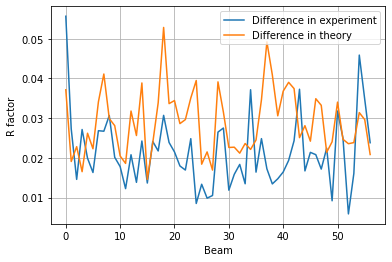

In [ ]:
plt.plot(exp_result[1], label = "Difference in experiment")
plt.plot(theo_result[1], label = "Difference in theory")
plt.xlabel("Beam")
plt.ylabel("R factor")
plt.legend()
plt.grid()